# Assignment 5 - Graphical Degrading and Object Detection

## Steps for Part 1 - Graphical Degrading
1. Download zip code from assignment repository
1. Download the yolov3.weights from the readme in the github repository (This file is too big for github versioning)
1. Edit/Create an git "exclude" file in the main portfolio directory ".git/info".  Add "yolov3.weights" on a line by itself.  This avoids a git push failure due to the size of the file.
1. Unzip into your local portfolio directory for Assignment5
1. Fill in the missing code in this notebook  (You will need the working code examples to do the next step)
1. Create a python class that allows the following
   - Reads in the image
   - Create a loop that alters individual changes of the items below to determine names of identified objects and their confidence (down to when the object detetion is lost).  Remember to reset the image through each pass as they are not iterative.
     - size
     - rotation
     - noise (of your choice)
   - Graph the results
   
## Steps for Part 2 - Object Detection
1.  Generate a web interface python script that ingests a POST command of a picture Use [postman](https://www.postman.com/) to generate the post with picture of your choice.
1.  Returns the items detected and the assocated confidence
1.  Add to your python class above to offer this capability
1.  Test web interface locally
1.  Create a Dockerfile and build the image
1.  Test the Dockerfile locally
1.  Push notebook, python script, readme, etc to your github portfolio (since you are in the right location locally you just need to do a push at the main directory of the portfolio (after git add * and git commit -m " comment)
1.  Push locally built and test docker image to your docker hub portfolio.  Manually add to docker readme.
1.  Submit the two links (github Assignment5 directory and docker hub) via text submission to Canvas.

## Initial Start
* Load Libraries (Need to install wandb and cv2 - see below)
* plot_cv_image( img ) allows output of image within a notebook

In [1]:
import cv2 as cv
# !pip install opencv-python-headless
import numpy as np
import matplotlib.pyplot as plt 
# !pip install wandb
from wandb import Classes


def plot_cv_img(input_image):     
    """     
    Converts an image from BGR to RGB and plots     
    """   
    # change color channels order for matplotlib     
    plt.imshow(cv.cvtColor(input_image, cv.COLOR_BGR2RGB))          

    # For easier view, turn off axis around image     
    plt.axis('off')  
    # Must save prior to show - for show clears the image!
    # plt.savefig("DetectionOutput.jpg")
    plt.show()

## Load Yolo Model

In [2]:
# load yolo
net = cv.dnn.readNet("yolov3.weights", "yolov3.cfg") # note weights to too big for github must save within readme

## Identify the number of layers in the model and their names

In [3]:
ln = net.getLayerNames()
print(len(ln), ln)

254 ('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'le

## Read in and print out the categories for Yolo

In [4]:
classes = []
with open("coco.names", 'r') as f:
    classes = [line.strip() for line in f.readlines()]

## Read in an image and output its dimensions

In [5]:
img = cv.imread("Pictures/bermuda.jpg")
print("Original Shape: ", img.shape)

Original Shape:  (2229, 3344, 3)


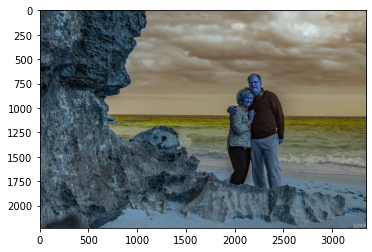

In [6]:
plt.imshow(img)

## Resize the image and output its dimensions

In [7]:
SCALE_PERCENT = 10 # Scale to 10% original size
img_dim = img.shape

new_width = int(img.shape[1]*SCALE_PERCENT/100)
new_height = int(img.shape[0]*SCALE_PERCENT/100)

new_dim = (new_width, new_height)
print(new_dim)

(334, 222)


In [8]:
img_resized = cv.resize(img, new_dim)  # Add code to resize
height, width, channel = img_resized.shape
print("Resized Shape: ", img_resized.shape)

Resized Shape:  (222, 334, 3)


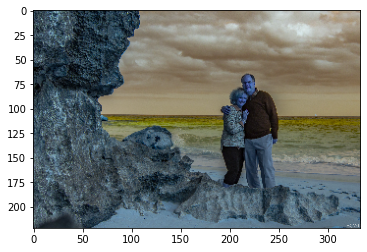

In [9]:
plt.imshow(img_resized)

## Rotate the image using cv

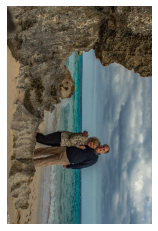

In [10]:
# Rotate
rotated_img = cv.rotate(img_resized, cv.ROTATE_90_CLOCKWISE)
plot_cv_img(rotated_img)

## Rotate the image using scipy (might have to install if necessary)

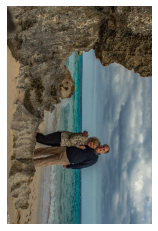

In [11]:
# Rotate
from scipy import ndimage
rotated_img = ndimage.rotate(img_resized, -90) # add code to rotate
plot_cv_img(rotated_img)

## Add Salt and Pepper Noise

In [12]:
#add salt and pepper noise
from skimage.util import random_noise
# Add salt-and-pepper noise to the image.

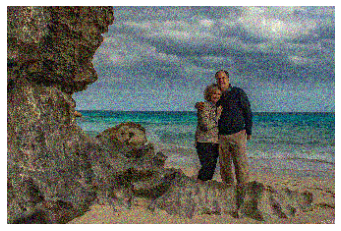

In [13]:
noise_img = random_noise(img_resized, 'gaussian')  # add code to add salt and pepper noise
noise_img = np.array(255*noise_img, dtype = 'uint8')

plot_cv_img(noise_img)

# Add Gaussian noise

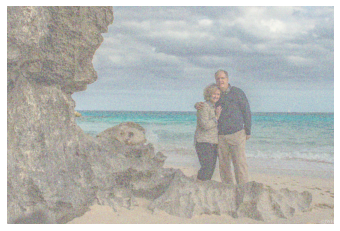

In [14]:
gauss = np.random.normal(0, 10, img.shape) # add code  to add gaussian noise
gauss = gauss.reshape(img.shape[0], img.shape[1], img.shape[2]).astype('uint8')

# Add the Gaussian noise to the image
img_gauss = cv.add(img, gauss)

# Display the image
plot_cv_img(img_gauss)

## Add Speckle Noise with color

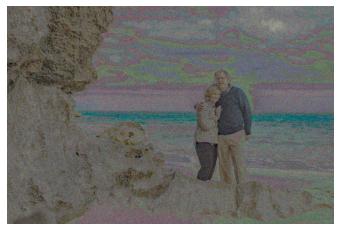

In [15]:
#Speckle Noise
import numpy as np
 
img = cv.imread('Pictures/bermuda.jpg')
 
gauss = np.random.normal(0, 2, img.shape)  # add code to add speckle noise
gauss = gauss.reshape(img.shape[0], img.shape[1], img.shape[2]).astype('uint8')
speckle_img = img + img*gauss
plot_cv_img(speckle_img)

## Set up layers and colors

In [16]:
layer_name = net.getLayerNames()
output_layer = [layer_name[i - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

## Fire up Model

In [17]:
#note - 0.00392 = 1/250   416 is a standard square for yolo
resized = cv.resize(img, (224, 224))
blob = cv.dnn.blobFromImage(resized, scalefactor=0.00392, size=(224, 224), swapRB=True)  # Fill in other fields to create image compatible with cv

#detect objects
net.setInput(blob)
outs = net.forward(output_layer)

## Set up image on screen  (all done for you)
* Note how to extract the identified objects and their assocated confidence.  You need that for part 2 of this assignment

In [18]:
# Showing Information on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detection
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # cv.circle(img, (center_x, center_y), 10, (0, 255, 0), 2 )
            # Reactangle Cordinate
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

print(len(class_ids))
print("Type: ", type(class_ids))

indexes = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes[0])

detections = []
font = cv.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        print(f'Object: {label} with confidence of {confidences[i]:.2f}')
        detections.append((label, confidences[i]))
        color = colors[i]
        cv.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv.putText(img, label, (x, y + 30), font, 3, color, 3)


print(detections)

6
Type:  <class 'list'>
2
Object: person with confidence of 1.00
Object: person with confidence of 0.98
[('person', 0.9958015084266663), ('person', 0.9845905303955078)]


### Modify all three attributes and detect confidences

Scaling
Object 0: person with confidence of 0.95
Object 0: person with confidence of 1.00
Object 1: person with confidence of 0.99
Object 0: person with confidence of 1.00
Object 1: person with confidence of 0.99
Object 0: person with confidence of 1.00
Object 1: person with confidence of 0.99
Object 0: person with confidence of 1.00
Object 1: person with confidence of 0.99
Object 0: person with confidence of 1.00
Object 1: person with confidence of 0.99
Object 0: person with confidence of 1.00
Object 1: person with confidence of 0.99
Object 0: person with confidence of 1.00
Object 1: person with confidence of 0.99
Object 0: person with confidence of 1.00
Object 1: person with confidence of 0.99
Object 0: person with confidence of 1.00
Object 1: person with confidence of 0.99
Object 0: person with confidence of 1.00
Object 1: person with confidence of 0.99
Object 0: person with confidence of 1.00
Object 1: person with confidence of 0.99
Object 0: person with confidence of 1.00
Object 1

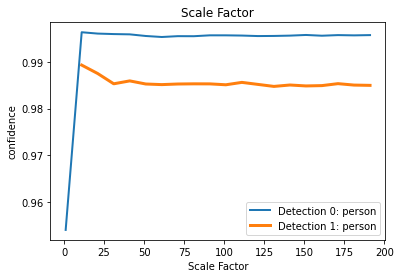

Rotating
Object 0: person with confidence of 1.00
Object 1: person with confidence of 0.98
Object 0: person with confidence of 0.99
Object 1: person with confidence of 0.99
Object 0: person with confidence of 0.99
Object 0: person with confidence of 0.92
Object 0: bird with confidence of 0.84
Object 0: person with confidence of 0.70
Object 0: person with confidence of 0.96
Object 0: person with confidence of 0.89
Object 0: person with confidence of 0.76
Object 0: person with confidence of 0.57
Object 0: person with confidence of 0.95
Object 0: person with confidence of 0.91


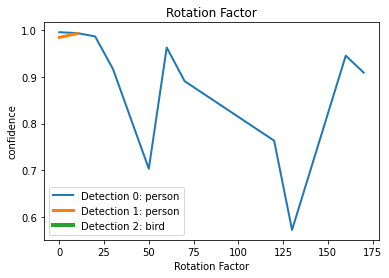

Inserting Noise
Object 0: person with confidence of 1.00
Object 1: person with confidence of 0.98
Object 0: person with confidence of 0.98
Object 1: person with confidence of 0.99
Object 0: person with confidence of 0.91
Object 1: person with confidence of 0.90
Object 2: person with confidence of 0.99
Object 0: person with confidence of 0.87


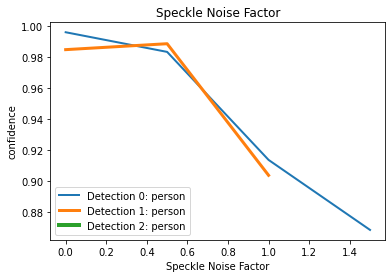

In [19]:
import Object_Detection as obj_det
ot = obj_det.ObjectDetection()
image = "Pictures/bermuda.jpg"
ot.modify_and_plot_objects(image)

# Summary
* Assignment and Model Results
* Techniques to improve the results

PUT YOUR ANSWERS HERE which could include additional cells with working code examples

### Model Results

After modifying scale, rotation, and noise in three seperate loops the behavior was observed based on the model's ability to predict the objects in the picture. My results show in the first plot that the confidence in the prediction is not affected much by the scale factor when scaling from 1% original size to 190% original size. However, increasing the rotation from 0 - 135 deg shows that the model decreases confidence in it's prediction until it can no longer predict. The model is no longer able to predict person 2's detection with any confidence past 10 degrees. I suspect this is due to the model thinking that the two people in the picture are one person. These two pieces of information indicates to me that the orientation of the image is more important than the size, assuming the aspect ratio is correct. 

The speckle noise plots show some oscilations on some of the predictions, but ultimately the noise scrambles the image until the model can no longer recognize the objects. The detection in the first and second object are able to maintain some confidence until it drops completely off. Once again person 1 is able to be detected with more noise introduced. This may be once again due to the model believing that the two people are 1. 

### Experiment Improvements

What I would have liked to do for this experiment was to modify all three in a loop while incrementing them all. With each increment the data for each detection would be saved and plotted on a surface plot with the heat signature showing the confidence level. Showing the contour would interestingly show the affect of all parameters being altered together. When originally trying this, I found it difficult to know which detection object corresponded to what data. When combining the three modifications all sorts of different classifications kept being classified, such as "cake". Figuring out a better way to eliminate phantom detections would make the plotting of this experiment for the case described as well as the plots produced in this notebook. More rotations and noise variations could be performed to improve the experiment. I found that the rotation can take alot of time, so the rotation was limited to 10 deg angles. 